<a href="https://colab.research.google.com/github/pravin-raut/MachineLearning/blob/Master/dissertation/Currency_%26_Oil_Forecast_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [752]:
!pip install pmdarima
!pip install quandl
!pip install yfinance

In [753]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime,timedelta
import json
import quandl

In [754]:
import urllib.request

file_path = "https://raw.githubusercontent.com/pravin-raut/MachineLearning/Master/dissertation/Config/Config_Git.json"

with urllib.request.urlopen(file_path) as infile:
  data = json.load(infile)

  api_key=data["nasdaq"]["api_key"]
quandl.ApiConfig.api_key = api_key


In [755]:
CurrentDate = (datetime.today() - timedelta(days=0)).strftime('%Y-%m-%d')
CurrentDate
FirstDay='2019-01-01'
LastDay='2023-06-30'

In [756]:

def getDataFromAPI(API,symbol,start_date,end_date):

  if API=="YFinance":
    # Create a ticker object
    ticker = yf.Ticker(symbol)
    # Download historical data
    data = ticker.history(period="1d", start=start_date, end=end_date)

  if API=="Nasdaq":
    data = quandl.get(symbol,start_date=start_date,end_date=end_date)


  return data

In [757]:

df_Oil_InUSD=getDataFromAPI("Nasdaq","OPEC/ORB",FirstDay,CurrentDate).reset_index()
df_Oil_InUSD['Date'] = pd.to_datetime(df_Oil_InUSD['Date']).dt.date
df_Oil_InUSD.set_index('Date', inplace=True)
# Set Frequencey as B
df_Oil_InUSD=df_Oil_InUSD.asfreq('b')
df_Oil_InUSD['Original_Oil_Price']=df_Oil_InUSD.Value.fillna(method='bfill')
df_Oil_InUSD=df_Oil_InUSD[['Original_Oil_Price']]
df_Oil_InUSD = df_Oil_InUSD[df_Oil_InUSD.index <= pd.to_datetime('2023-06-30')]
df_Oil_InUSD

,Original_Oil_Price
Date,
2019-01-02,52.14
2019-01-03,52.93
2019-01-04,55.13
2019-01-07,56.42
2019-01-08,56.09
...,...
2023-06-26,74.65
2023-06-27,75.15
2023-06-28,74.38


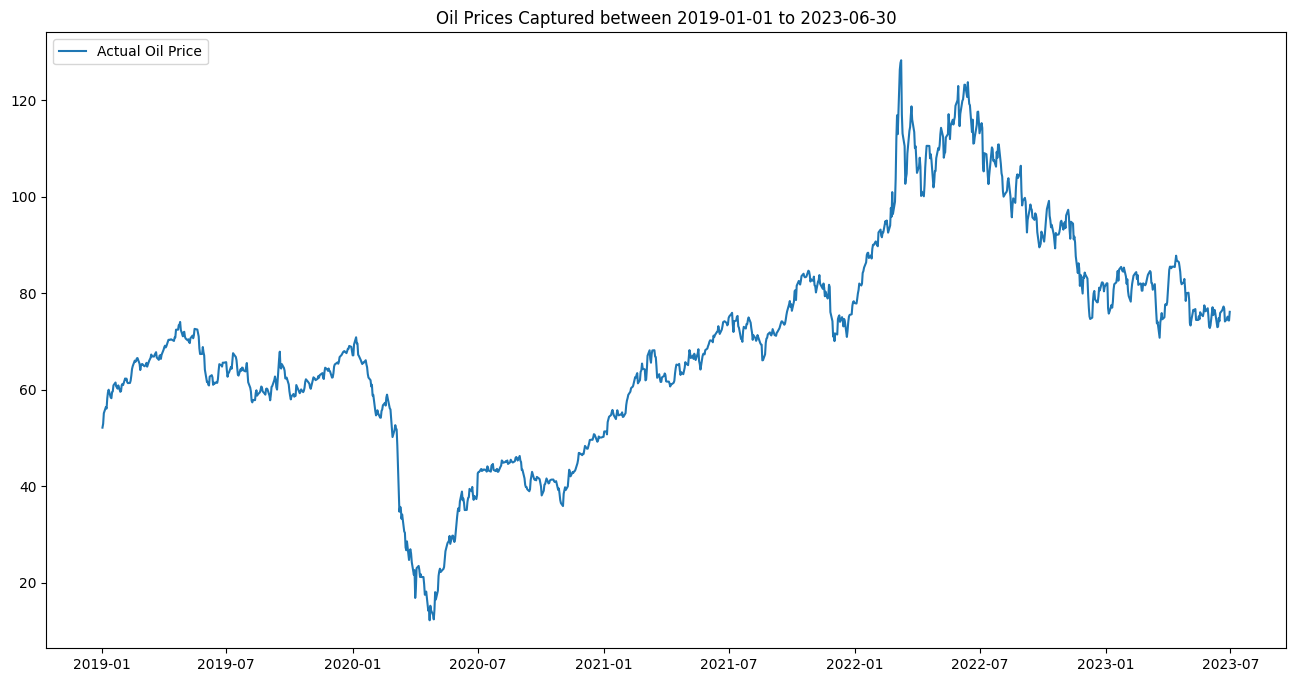

In [758]:
plt.figure(figsize=(16,8))
plt.plot(df_Oil_InUSD['Original_Oil_Price'],label="Actual Oil Price")
plt.title("Oil Prices Captured between 2019-01-01 to 2023-06-30")
plt.legend(loc="upper left")
plt.show()


In [759]:
df_USD_EUR=getDataFromAPI("YFinance","EURUSD=X",FirstDay,CurrentDate).reset_index()
df_USD_EUR['Date'] = pd.to_datetime(df_USD_EUR['Date']).dt.date
df_USD_EUR.set_index('Date', inplace=True)
df_USD_EUR=df_USD_EUR.asfreq('b')
df_USD_EUR.Close=df_USD_EUR.Close.fillna(method='bfill')
df_USD_EUR['Original_USD_EUR_Price']=df_USD_EUR[['Close']]
df_USD_EUR=df_USD_EUR[['Original_USD_EUR_Price']].iloc[1:]
df_USD_EUR = df_USD_EUR[df_USD_EUR.index <= pd.to_datetime('2023-06-30')]
df_USD_EUR

,Original_USD_EUR_Price
Date,
2019-01-02,1.146171
2019-01-03,1.131811
2019-01-04,1.139108
2019-01-07,1.141044
2019-01-08,1.147974
...,...
2023-06-26,1.090667
2023-06-27,1.091048
2023-06-28,1.095722


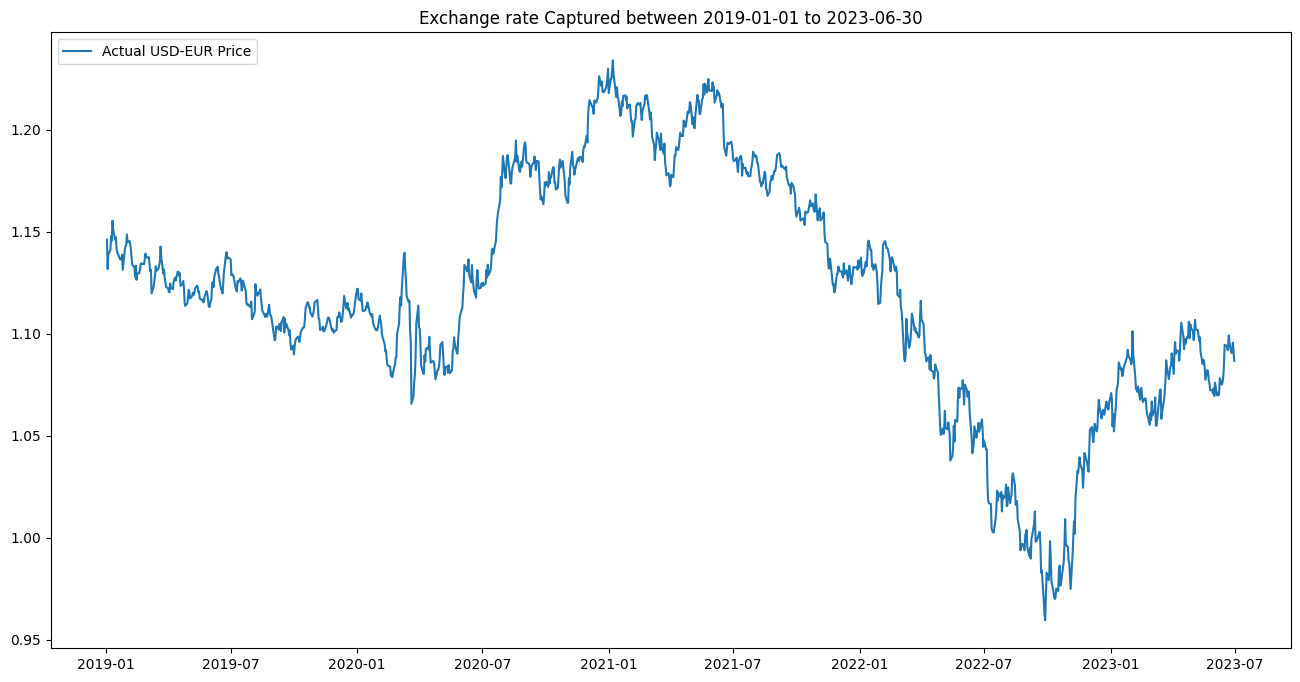

In [760]:
plt.figure(figsize=(16,8))
plt.plot(df_USD_EUR['Original_USD_EUR_Price'],label="Actual USD-EUR Price")
plt.title("Exchange rate Captured between 2019-01-01 to 2023-06-30")
plt.legend(loc="upper left")
plt.show()


In [761]:
df_USD_EUR[df_USD_EUR.index.isin(df_Oil_InUSD.index)]


,Original_USD_EUR_Price
Date,
2019-01-02,1.146171
2019-01-03,1.131811
2019-01-04,1.139108
2019-01-07,1.141044
2019-01-08,1.147974
...,...
2023-06-26,1.090667
2023-06-27,1.091048
2023-06-28,1.095722


In [762]:
def compare_plots(col1, col2, label1, label2, title):
    plt.figure(figsize=(16,8))
    plt.plot(col1,label=label1)
    plt.plot(col2,label=label2)
    plt.title(title)
    plt.legend(loc="upper left")
    plt.show()


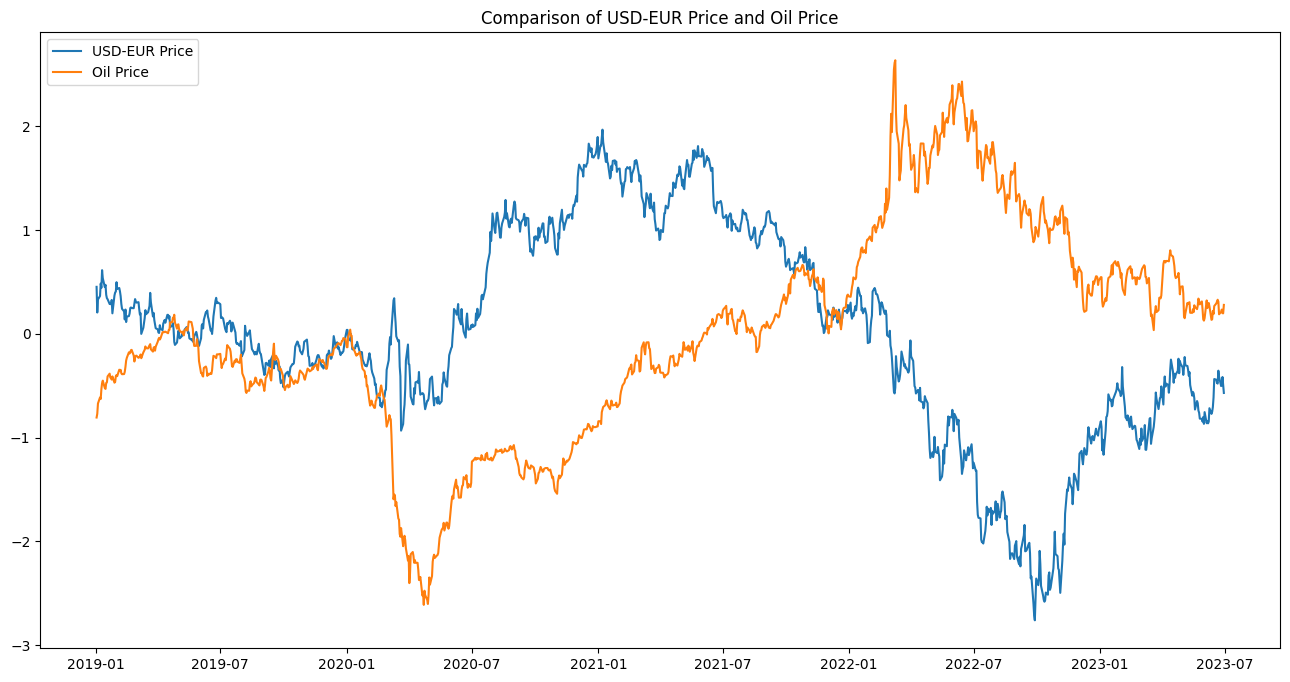

In [763]:
import matplotlib.pyplot as plt
import pandas as pd

df_USD_EUR['USD_EUR_Price_standardized'] = (df_USD_EUR['Original_USD_EUR_Price'] - df_USD_EUR['Original_USD_EUR_Price'].mean()) / df_USD_EUR['Original_USD_EUR_Price'].std()
df_Oil_InUSD['Oil_Price_standardized'] = (df_Oil_InUSD['Original_Oil_Price'] - df_Oil_InUSD['Original_Oil_Price'].mean()) / df_Oil_InUSD['Original_Oil_Price'].std()
compare_plots(df_USD_EUR['USD_EUR_Price_standardized'],df_Oil_InUSD['Oil_Price_standardized'],'USD-EUR Price','Oil Price','Comparison of USD-EUR Price and Oil Price')



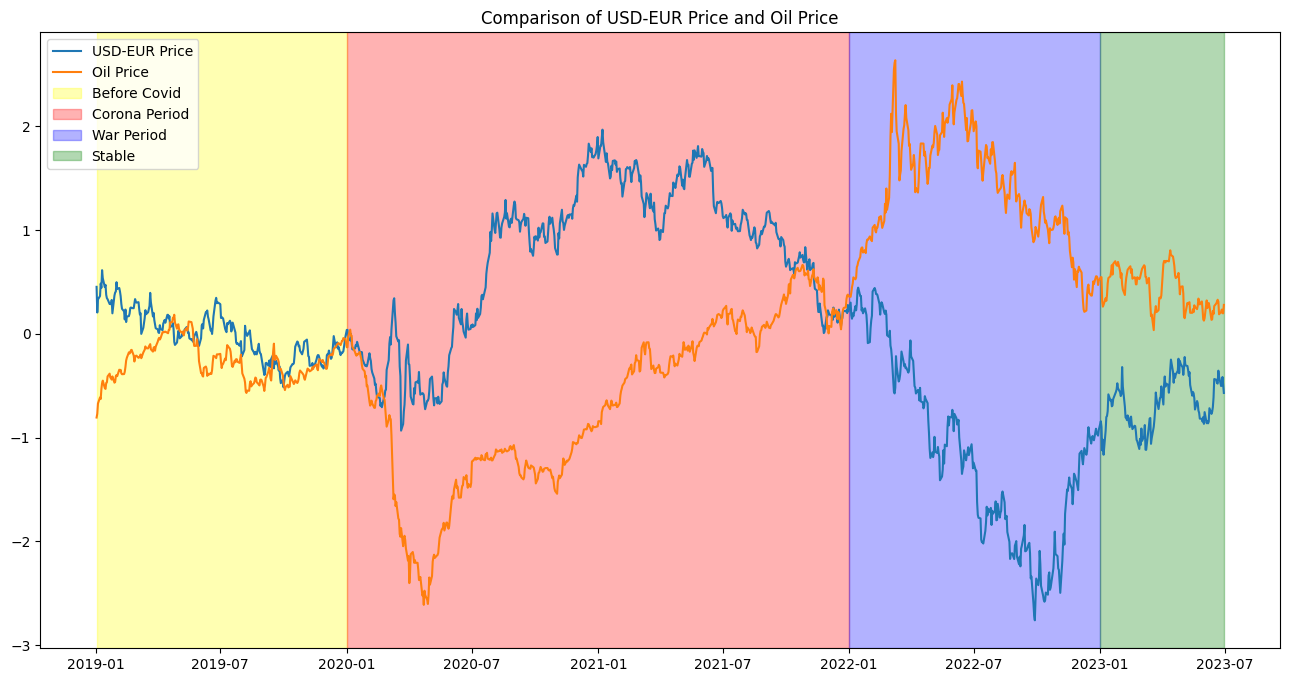

In [764]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(df_USD_EUR['USD_EUR_Price_standardized'], label="USD-EUR Price")
ax.plot(df_Oil_InUSD['Oil_Price_standardized'], label="Oil Price")

# Part 1
ax.axvspan(df_USD_EUR.index.min(), pd.to_datetime('2020-01-01'), color='yellow', alpha=0.3, label='Before Covid')
# Corona Period
ax.axvspan(pd.to_datetime('2020-01-01'), pd.to_datetime('2022-01-01'), color='red', alpha=0.3, label='Corona Period')
# War period
ax.axvspan(pd.to_datetime('2022-01-01'), pd.to_datetime('2023-01-01'), color='blue', alpha=0.3, label='War Period')
# Stable
ax.axvspan(pd.to_datetime('2023-01-01'), df_USD_EUR.index.max(), color='green', alpha=0.3, label='Stable')

ax.set_title('Comparison of USD-EUR Price and Oil Price')
ax.legend(loc="upper left")

plt.show()


,seasonal,trend,resid,Original_USD_EUR_Price
Date,,,,
2019-01-02,0.000078,1.135878,0.010214,1.146171
2019-01-03,0.000251,1.138190,-0.006631,1.131811
2019-01-04,-0.000096,1.141222,-0.002018,1.139108
2019-01-07,-0.000319,1.141109,0.000255,1.141044
2019-01-08,0.000084,1.145846,0.002044,1.147974
...,...,...,...,...
2023-06-26,-0.000319,1.094518,-0.003532,1.090667
2023-06-27,0.000084,1.092982,-0.002019,1.091048
2023-06-28,0.000078,1.091165,0.004479,1.095722


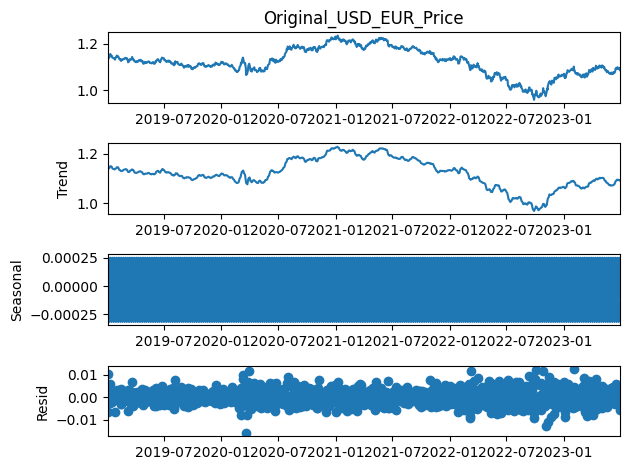

In [765]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(df_USD_EUR['Original_USD_EUR_Price'], model='additive', extrapolate_trend='freq')
result_add.plot()
result_add_df=pd.concat([result_add.seasonal,result_add.trend,result_add.resid,result_add.observed],axis=1)
result_add_df


,seasonal,trend,resid,Original_Oil_Price
Date,,,,
2019-01-02,0.019001,52.7428,-0.621801,52.14
2019-01-03,-0.094832,53.7488,-0.723968,52.93
2019-01-04,-0.011598,54.5420,0.599598,55.13
2019-01-07,-0.029465,55.7580,0.691465,56.42
2019-01-08,0.116894,57.0640,-1.090894,56.09
...,...,...,...,...
2023-06-26,-0.029465,75.0300,-0.350535,74.65
2023-06-27,0.116894,74.5320,0.501106,75.15
2023-06-28,0.019001,74.9320,-0.571001,74.38


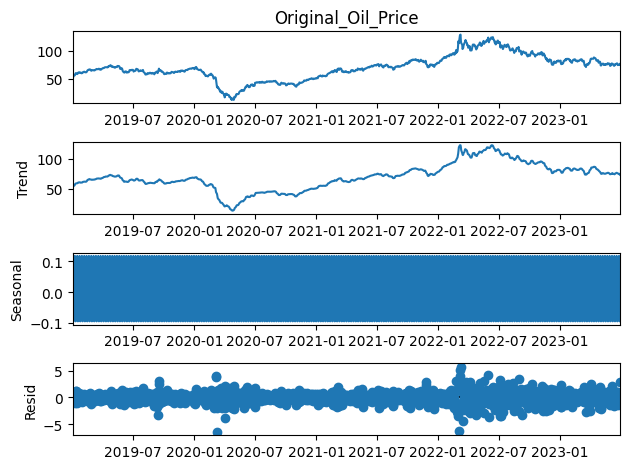

In [766]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(df_Oil_InUSD['Original_Oil_Price'], model='additive', extrapolate_trend='freq')
result_add.plot()
result_add_df=pd.concat([result_add.seasonal,result_add.trend,result_add.resid,result_add.observed],axis=1)
result_add_df


In [767]:

df_USD_EUR['Original_USD_EUR_Price_MA_7'] = df_USD_EUR['Original_USD_EUR_Price'].rolling(window=7,min_periods=1).mean()
df_Oil_InUSD['Original_Oil_Price_MA_5'] = df_Oil_InUSD['Original_Oil_Price'].rolling(window=5,min_periods=1).mean()




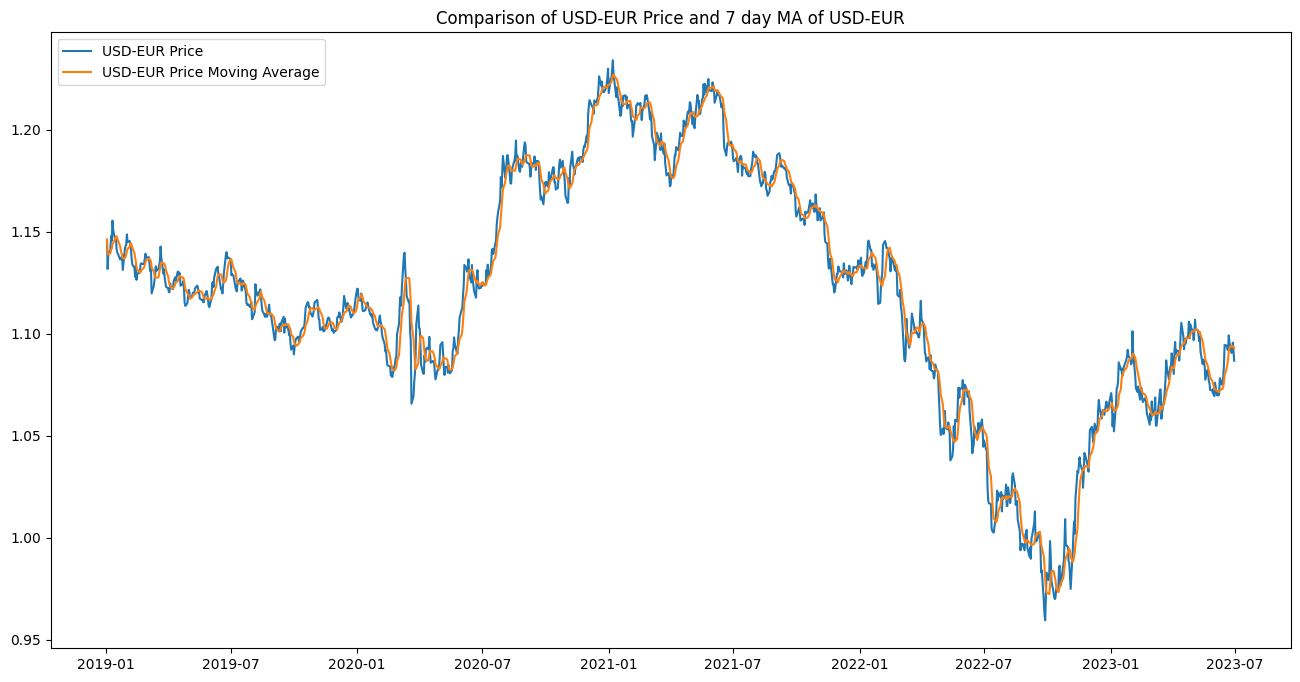

In [768]:
compare_plots(df_USD_EUR['Original_USD_EUR_Price'],df_USD_EUR['Original_USD_EUR_Price_MA_7'],'USD-EUR Price','USD-EUR Price Moving Average','Comparison of USD-EUR Price and 7 day MA of USD-EUR')


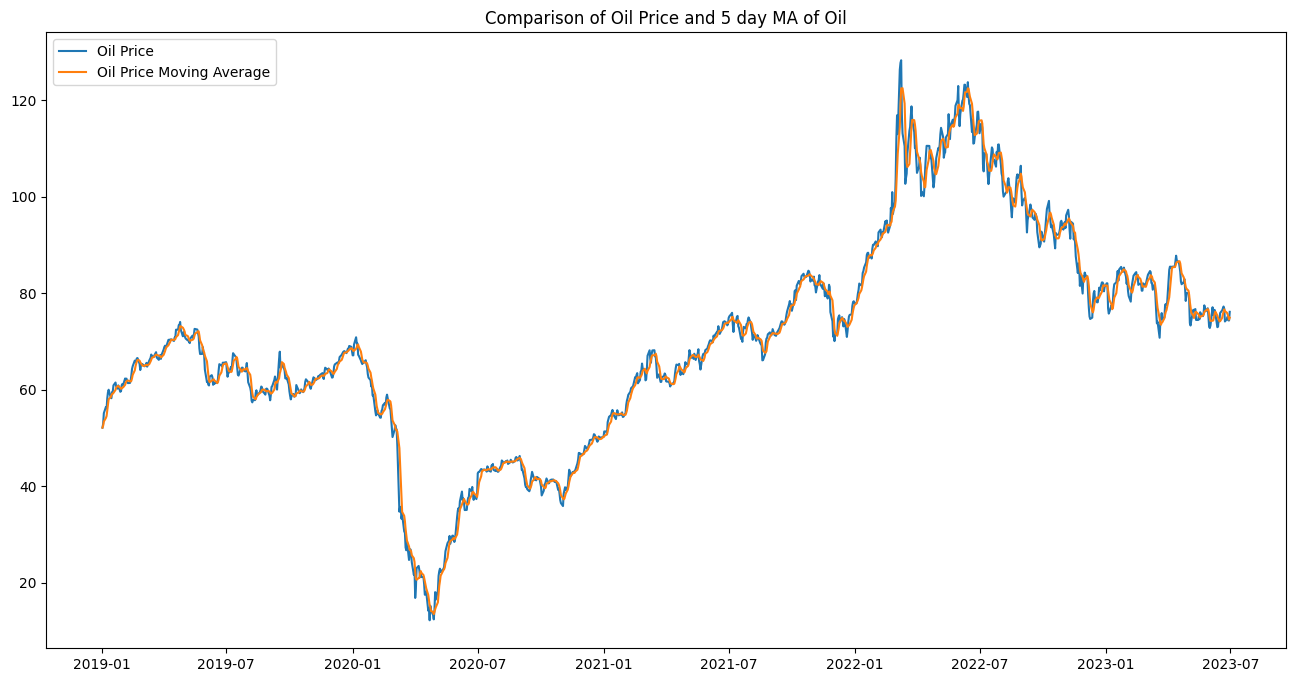

In [769]:
compare_plots(df_Oil_InUSD['Original_Oil_Price'],df_Oil_InUSD['Original_Oil_Price_MA_5'],'Oil Price','Oil Price Moving Average','Comparison of Oil Price and 5 day MA of Oil')


In [770]:
def generate_shift_columns(df, column_name, min_shift, max_shift):
    for i in range(min_shift, max_shift + 1):
        df[f'{column_name}_back{i}'] = df[column_name].shift(i)
    return df


In [771]:
df_oil_currency = df_Oil_InUSD.join(df_USD_EUR, how='inner')


In [772]:
from sklearn.preprocessing import StandardScaler
scaler_Cur = StandardScaler()
df_oil_currency[['Original_USD_EUR_Price_MA_7_Scaled']] = scaler_Cur.fit_transform(df_oil_currency[['Original_USD_EUR_Price_MA_7']])

scaler_Oil = StandardScaler()

df_oil_currency[['Original_Oil_Price_MA_5_Scaled']] = scaler_Oil.fit_transform(df_oil_currency[['Original_Oil_Price_MA_5']])
df_oil_currency

,Original_Oil_Price,Oil_Price_standardized,Original_Oil_Price_MA_5,Original_USD_EUR_Price,USD_EUR_Price_standardized,Original_USD_EUR_Price_MA_7,Original_USD_EUR_Price_MA_7_Scaled,Original_Oil_Price_MA_5_Scaled
Date,,,,,,,,
2019-01-02,52.14,-0.806564,52.140,1.146171,0.453084,1.146171,0.453116,-0.806817
2019-01-03,52.93,-0.770832,52.535,1.131811,0.205678,1.138991,0.328795,-0.788907
2019-01-04,55.13,-0.671324,53.400,1.139108,0.331395,1.139030,0.329469,-0.749686
2019-01-07,56.42,-0.612977,54.155,1.141044,0.364760,1.139534,0.338190,-0.715452
2019-01-08,56.09,-0.627903,54.542,1.147974,0.484139,1.141222,0.367417,-0.697905
...,...,...,...,...,...,...,...,...
2023-06-26,74.65,0.211580,75.942,1.090667,-0.503150,1.094156,-0.447485,0.272417
2023-06-27,75.15,0.234195,75.602,1.091048,-0.496589,1.093650,-0.456258,0.257001
2023-06-28,74.38,0.199367,75.030,1.095722,-0.416059,1.093866,-0.452521,0.231065


In [773]:
generate_shift_columns(df_oil_currency, 'Original_USD_EUR_Price_MA_7_Scaled', 1, 5)
generate_shift_columns(df_oil_currency, 'Original_Oil_Price_MA_5_Scaled', 1, 5)
df_oil_currency

,Original_Oil_Price,Oil_Price_standardized,Original_Oil_Price_MA_5,Original_USD_EUR_Price,USD_EUR_Price_standardized,Original_USD_EUR_Price_MA_7,Original_USD_EUR_Price_MA_7_Scaled,Original_Oil_Price_MA_5_Scaled,Original_USD_EUR_Price_MA_7_Scaled_back1,Original_USD_EUR_Price_MA_7_Scaled_back2,Original_USD_EUR_Price_MA_7_Scaled_back3,Original_USD_EUR_Price_MA_7_Scaled_back4,Original_USD_EUR_Price_MA_7_Scaled_back5,Original_Oil_Price_MA_5_Scaled_back1,Original_Oil_Price_MA_5_Scaled_back2,Original_Oil_Price_MA_5_Scaled_back3,Original_Oil_Price_MA_5_Scaled_back4,Original_Oil_Price_MA_5_Scaled_back5
Date,,,,,,,,,,,,,,,,,,
2019-01-02,52.14,-0.806564,52.140,1.146171,0.453084,1.146171,0.453116,-0.806817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,52.93,-0.770832,52.535,1.131811,0.205678,1.138991,0.328795,-0.788907,0.453116,NaN,NaN,NaN,NaN,-0.806817,NaN,NaN,NaN,NaN
2019-01-04,55.13,-0.671324,53.400,1.139108,0.331395,1.139030,0.329469,-0.749686,0.328795,0.453116,NaN,NaN,NaN,-0.788907,-0.806817,NaN,NaN,NaN
2019-01-07,56.42,-0.612977,54.155,1.141044,0.364760,1.139534,0.338190,-0.715452,0.329469,0.328795,0.453116,NaN,NaN,-0.749686,-0.788907,-0.806817,NaN,NaN
2019-01-08,56.09,-0.627903,54.542,1.147974,0.484139,1.141222,0.367417,-0.697905,0.338190,0.329469,0.328795,0.453116,NaN,-0.715452,-0.749686,-0.788907,-0.806817,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,74.65,0.211580,75.942,1.090667,-0.503150,1.094156,-0.447485,0.272417,-0.463222,-0.505161,-0.561964,-0.603868,-0.638889,0.288741,0.304610,0.280760,0.258996,0.224627
2023-06-27,75.15,0.234195,75.602,1.091048,-0.496589,1.093650,-0.456258,0.257001,-0.447485,-0.463222,-0.505161,-0.561964,-0.603868,0.272417,0.288741,0.304610,0.280760,0.258996
2023-06-28,74.38,0.199367,75.030,1.095722,-0.416059,1.093866,-0.452521,0.231065,-0.456258,-0.447485,-0.463222,-0.505161,-0.561964,0.257001,0.272417,0.288741,0.304610,0.280760


In [774]:
df_oil_currency.columns

Index(['Original_Oil_Price', 'Oil_Price_standardized',
       'Original_Oil_Price_MA_5', 'Original_USD_EUR_Price',
       'USD_EUR_Price_standardized', 'Original_USD_EUR_Price_MA_7',
       'Original_USD_EUR_Price_MA_7_Scaled', 'Original_Oil_Price_MA_5_Scaled',
       'Original_USD_EUR_Price_MA_7_Scaled_back1',
       'Original_USD_EUR_Price_MA_7_Scaled_back2',
       'Original_USD_EUR_Price_MA_7_Scaled_back3',
       'Original_USD_EUR_Price_MA_7_Scaled_back4',
       'Original_USD_EUR_Price_MA_7_Scaled_back5',
       'Original_Oil_Price_MA_5_Scaled_back1',
       'Original_Oil_Price_MA_5_Scaled_back2',
       'Original_Oil_Price_MA_5_Scaled_back3',
       'Original_Oil_Price_MA_5_Scaled_back4',
       'Original_Oil_Price_MA_5_Scaled_back5'],
      dtype='object')

In [775]:
# df_oil_currency['Year'] = df_oil_currency.index.year
# df_oil_currency['Month'] = df_oil_currency.index.month
# df_oil_currency['Day'] = df_oil_currency.index.day
# df_oil_currency['DayOfWeek'] = df_oil_currency.index.dayofweek
# df_oil_currency

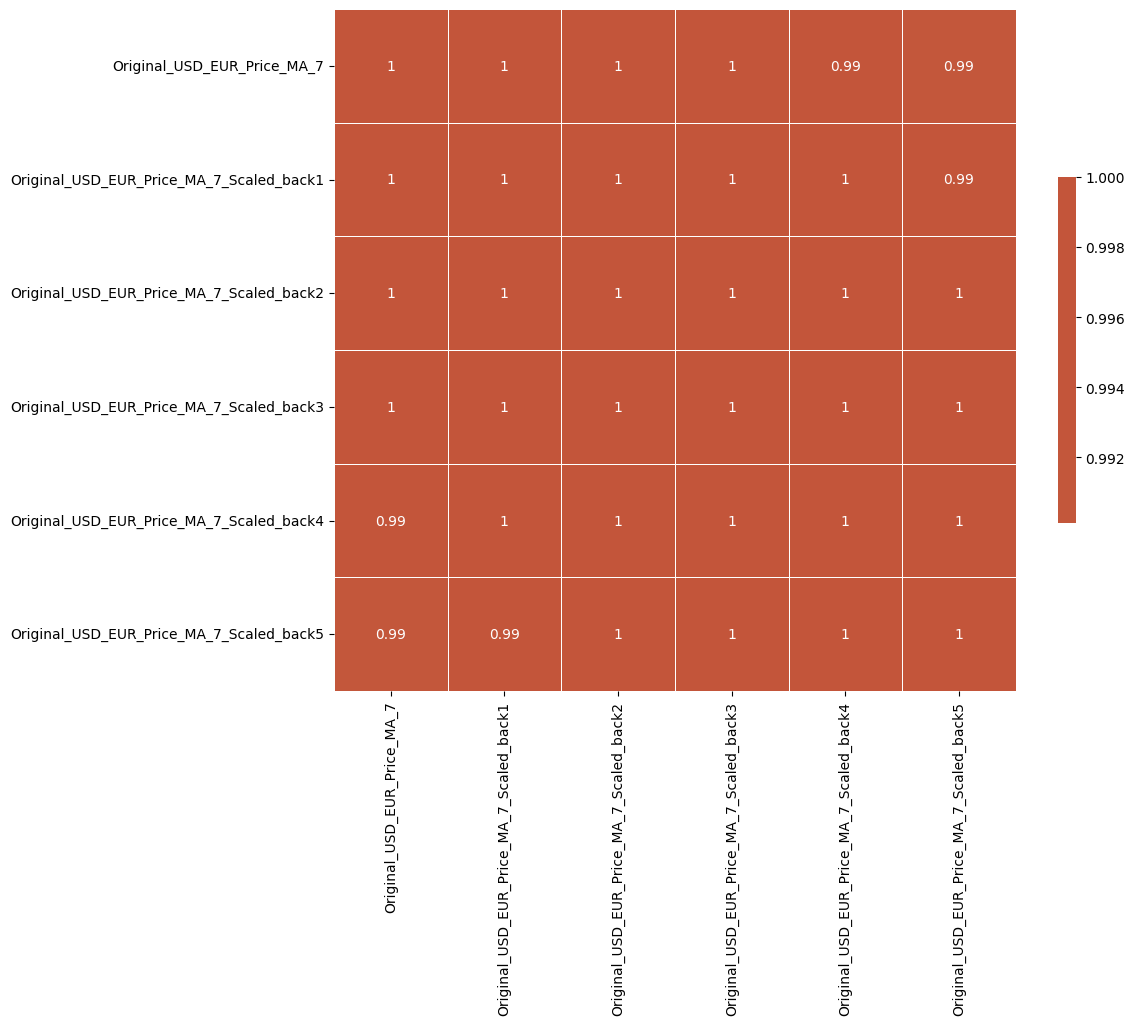

In [776]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that df is your DataFrame


# Calculate the correlation matrix
corr = df_oil_currency[['Original_USD_EUR_Price_MA_7', 'Original_USD_EUR_Price_MA_7_Scaled_back1','Original_USD_EUR_Price_MA_7_Scaled_back2','Original_USD_EUR_Price_MA_7_Scaled_back3','Original_USD_EUR_Price_MA_7_Scaled_back4','Original_USD_EUR_Price_MA_7_Scaled_back5']].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()


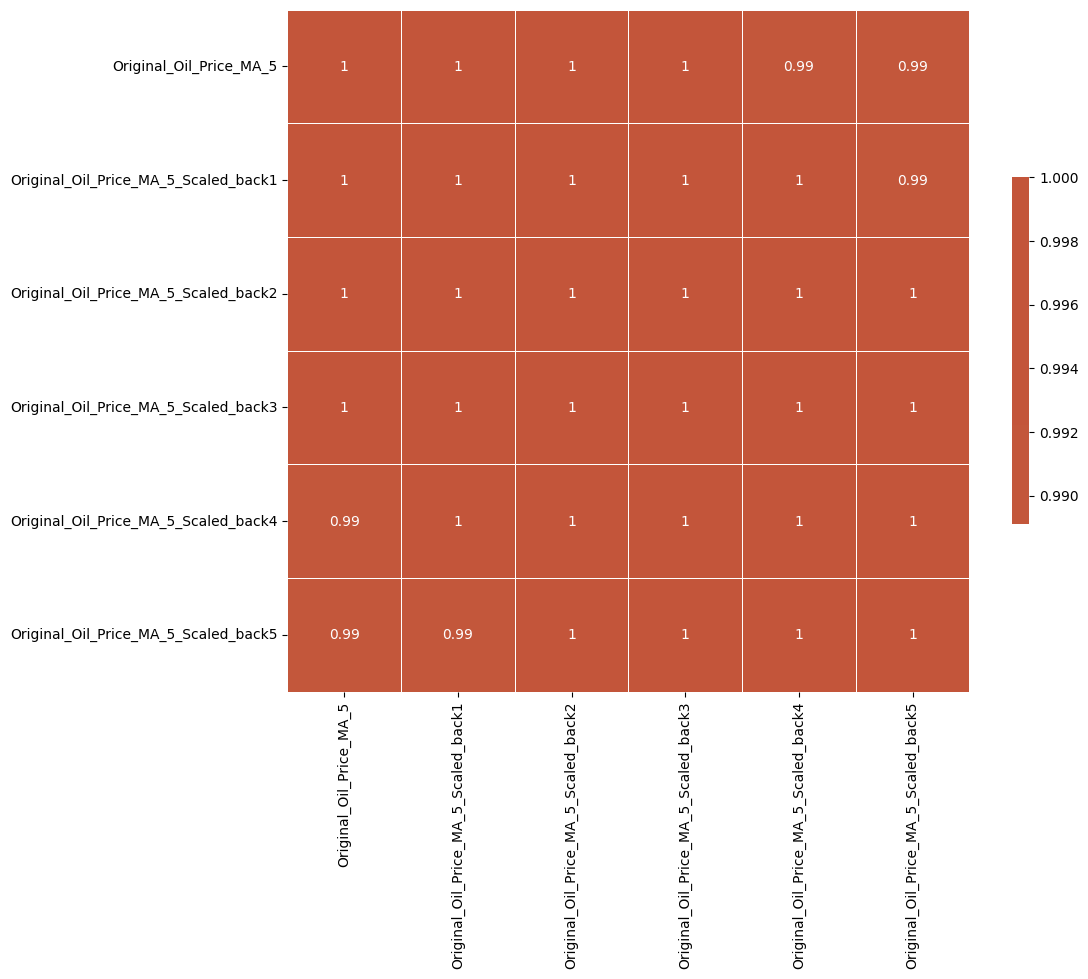

In [777]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that df is your DataFrame

# Calculate the correlation matrix
corr = df_oil_currency[['Original_Oil_Price_MA_5', 'Original_Oil_Price_MA_5_Scaled_back1','Original_Oil_Price_MA_5_Scaled_back2','Original_Oil_Price_MA_5_Scaled_back3','Original_Oil_Price_MA_5_Scaled_back4','Original_Oil_Price_MA_5_Scaled_back5']].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()


In [778]:
df_oil_currency.dropna(inplace=True)


In [779]:
# Define the start and end dates for train and test data
train_end_date = pd.to_datetime('2023-01-01')
test_end_date = pd.to_datetime('2023-06-30')


In [780]:
train_oil_currency = df_oil_currency[df_oil_currency.index <= train_end_date]
test_oil_currency = df_oil_currency[(df_oil_currency.index > train_end_date) & (df_oil_currency.index <= test_end_date)]
test_oil_currency.head(5)

,Original_Oil_Price,Oil_Price_standardized,Original_Oil_Price_MA_5,Original_USD_EUR_Price,USD_EUR_Price_standardized,Original_USD_EUR_Price_MA_7,Original_USD_EUR_Price_MA_7_Scaled,Original_Oil_Price_MA_5_Scaled,Original_USD_EUR_Price_MA_7_Scaled_back1,Original_USD_EUR_Price_MA_7_Scaled_back2,Original_USD_EUR_Price_MA_7_Scaled_back3,Original_USD_EUR_Price_MA_7_Scaled_back4,Original_USD_EUR_Price_MA_7_Scaled_back5,Original_Oil_Price_MA_5_Scaled_back1,Original_Oil_Price_MA_5_Scaled_back2,Original_Oil_Price_MA_5_Scaled_back3,Original_Oil_Price_MA_5_Scaled_back4,Original_Oil_Price_MA_5_Scaled_back5
Date,,,,,,,,,,,,,,,,,,
2023-01-02,82.05,0.546287,81.584,1.070973,-0.842438,1.064975,-0.952739,0.528238,-0.977388,-0.985738,-0.989366,-1.002261,-1.002176,0.529870,0.523432,0.530233,0.506655,0.469475
2023-01-03,82.05,0.546287,81.548,1.067771,-0.897602,1.066038,-0.934340,0.526606,-0.952739,-0.977388,-0.985738,-0.989366,-1.002261,0.528238,0.529870,0.523432,0.530233,0.506655
2023-01-04,76.88,0.312444,80.532,1.054685,-1.123049,1.064310,-0.964256,0.480538,-0.934340,-0.952739,-0.977388,-0.985738,-0.989366,0.526606,0.528238,0.529870,0.523432,0.530233
2023-01-05,75.77,0.262238,79.608,1.060637,-1.020524,1.063826,-0.972631,0.438642,-0.964256,-0.934340,-0.952739,-0.977388,-0.985738,0.480538,0.526606,0.528238,0.529870,0.523432
2023-01-06,76.15,0.279426,78.580,1.052222,-1.165494,1.062184,-1.001063,0.392030,-0.972631,-0.964256,-0.934340,-0.952739,-0.977388,0.438642,0.480538,0.526606,0.528238,0.529870


In [781]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_values(data, lags,TitleACF):
    fig, ax = plt.subplots(figsize=(12, 4))
    plot_acf(data.dropna(), lags=lags, ax=ax,zero=False)
    plt.title(TitleACF)
    plt.show()

def plot_pacf_values(data, lags,TITLEPACT):
    fig, ax = plt.subplots(figsize=(12, 4))
    plot_pacf(data.dropna(), lags=lags, ax=ax,zero=False,alpha=0.05)
    plt.title(TITLEPACT)
    plt.show()



In [782]:
import warnings
warnings.filterwarnings("ignore")


In [783]:
from statsmodels.tsa.stattools import adfuller

def perform_adfuller(series, series_name):
    # Perform Augmented Dickey-Fuller test
    result = adfuller(series)

    # Extract test statistics and p-value
    test_statistic = result[0]
    p_value = result[1]

    # Print the results
    print("Augmented Dickey-Fuller Test:")
    print(f"Test Statistic: {test_statistic}")
    print(f"P-value: {p_value}")

    # Check the p-value against a significance level (e.g., 0.05) to determine stationarity
    if p_value <= 0.05:
        print(f"The time series {series_name} is stationary.")
    else:
        print(f"The time series {series_name} is non-stationary.")


In [784]:
perform_adfuller(train_oil_currency['Original_USD_EUR_Price_MA_7_Scaled'].diff(1).dropna(),'Original_USD_EUR_Price_MA_7_Scaled')

Augmented Dickey-Fuller Test:
Test Statistic: -5.198134025024839
P-value: 8.869533470435474e-06
The time series Original_USD_EUR_Price_MA_7_Scaled is stationary.


In [785]:
perform_adfuller(train_oil_currency['Original_Oil_Price_MA_5_Scaled'].diff(1).dropna(),'Original_Oil_Price_MA_5_Scaled')

Augmented Dickey-Fuller Test:
Test Statistic: -5.87780659676533
P-value: 3.129422164137629e-07
The time series Original_Oil_Price_MA_5_Scaled is stationary.


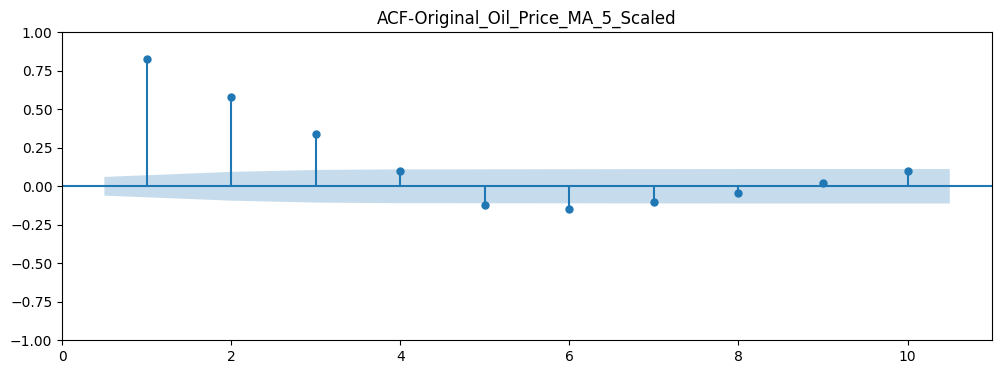

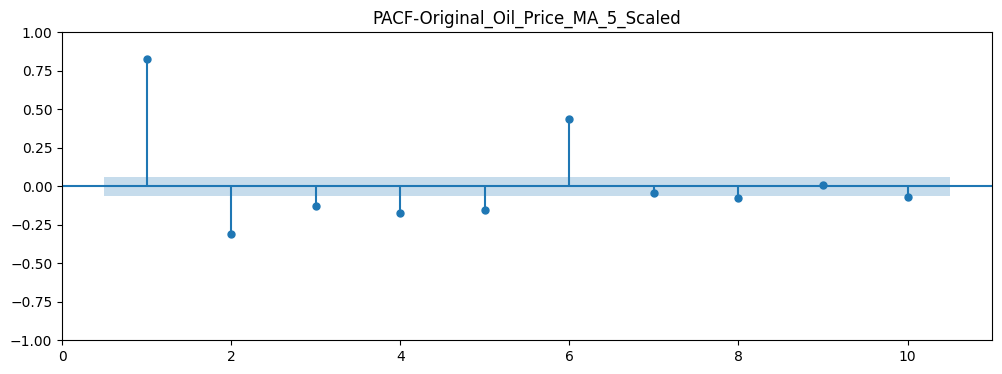

In [786]:
plot_acf_values(train_oil_currency['Original_Oil_Price_MA_5_Scaled'].diff(1).dropna(),10,'ACF-Original_Oil_Price_MA_5_Scaled')
plot_pacf_values(train_oil_currency['Original_Oil_Price_MA_5_Scaled'].diff(1).dropna(),10,'PACF-Original_Oil_Price_MA_5_Scaled')


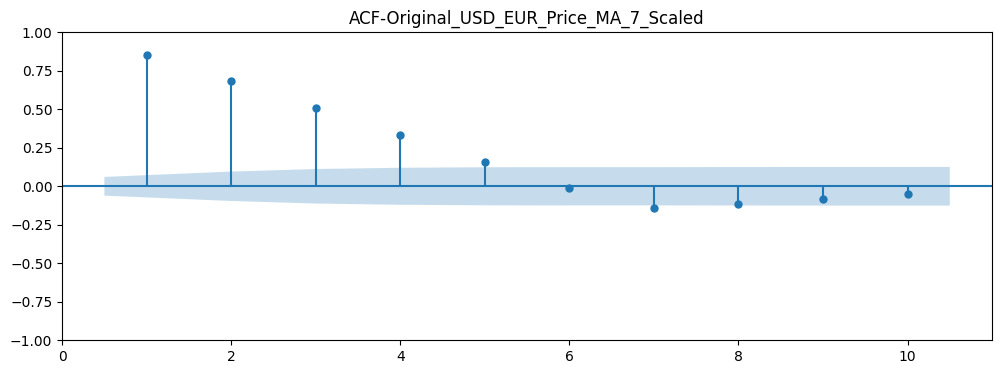

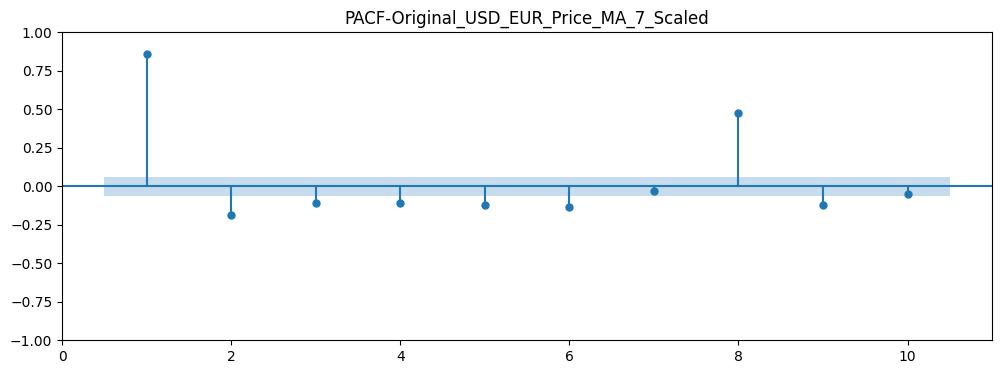

In [787]:
plot_acf_values(train_oil_currency['Original_USD_EUR_Price_MA_7_Scaled'].diff(1).dropna(),10,'ACF-Original_USD_EUR_Price_MA_7_Scaled')
plot_pacf_values(train_oil_currency['Original_USD_EUR_Price_MA_7_Scaled'].diff(1).dropna(),10,'PACF-Original_USD_EUR_Price_MA_7_Scaled')

In [788]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
exogdata=['Original_Oil_Price_MA_5_Scaled_back1','Original_Oil_Price_MA_5_Scaled_back2','Original_Oil_Price_MA_5_Scaled_back3','Original_Oil_Price_MA_5_Scaled_back4','Original_Oil_Price_MA_5_Scaled_back5']
oil_model=SARIMAX(train_oil_currency['Original_Oil_Price_MA_5_Scaled'],order=(5,1,5),exog=train_oil_currency[exogdata])
oil_model_fit=oil_model.fit(maxiter=1000)
oil_model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:     Original_Oil_Price_MA_5_Scaled   No. Observations:                 1038
Model:                           SARIMAX(5, 1, 5)   Log Likelihood                2884.010
Date:                            Fri, 21 Jul 2023   AIC                          -5736.021
Time:                                    12:20:53   BIC                          -5656.916
Sample:                                01-09-2019   HQIC                         -5706.008
                                     - 12-30-2022                                         
Covariance Type:                              opg                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Original_Oil_Price_MA_5_Scaled_back1     1.0330      0.166      6.223      0.000       0.708       1.358
Original_Oil_Price_MA_5_Scaled_back2     0.6236      0.196      3.186      0.001       0.240       1.007
Original_Oil_Price_MA_5_Scaled_back3    -0.6676      0.098     -6.783      0.000      -0.861      -0.475
Original_Oil_Price_MA_5_Scaled_back4    -0.2887      0.067     -4.295      0.000      -0.420      -0.157
Original_Oil_Price_MA_5_Scaled_back5     0.2982      0.049      6.084      0.000       0.202       0.394
ar.L1                                    0.1338      0.170      0.787      0.431      -0.199       0.467
ar.L2                                   -0.6965      0.090     -7.700      0.000      -0.874      -0.519
ar.L3                                    0.0413      0.197      0.209      0.834      -0.346       0.428
ar.L4                                   -0.1411      0.074     -1.895      0.058      -0.287       0.005
ar.L5                                   -0.0429      0.087     -0.494      0.621      -0.213       0.127
ma.L1                                   -0.0417      0.022     -1.885      0.059      -0.085       0.002
ma.L2                                    0.0260      0.025      1.050      0.294      -0.023       0.074
ma.L3                                   -0.0080      0.024     -0.328      0.743      -0.056       0.040
ma.L4                                   -0.0050      0.022     -0.226      0.821      -0.048       0.038
ma.L5                                   -0.9680      0.025    -38.101      0.000      -1.018      -0.918
sigma2                                   0.0002   6.66e-06     33.116      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              4539.14
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.51   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

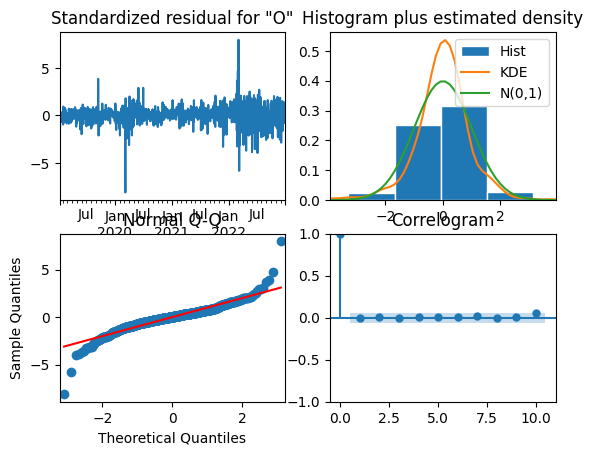

In [789]:
oil_model_fit.plot_diagnostics()
plt.show()

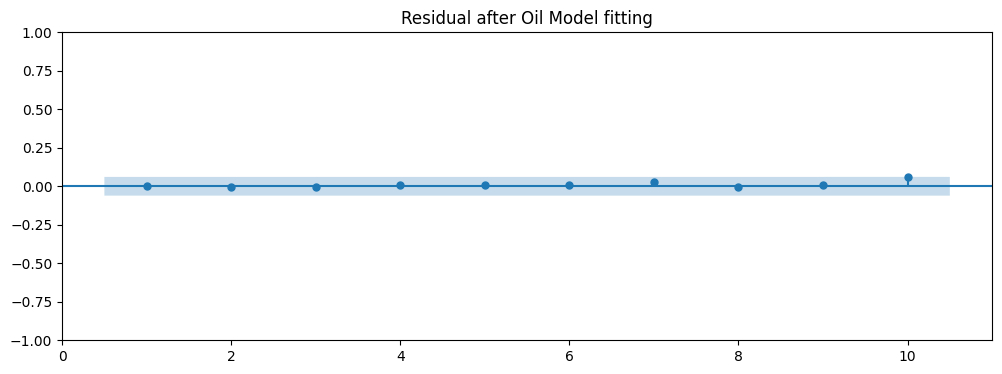

In [790]:
plot_acf_values(oil_model_fit.resid,10,"Residual after Oil Model fitting")

In [791]:
pd.set_option('display.max_rows', 100)


In [792]:
def GetMultiStepAheadPredictionOil(NoOfExogs,StepsAheadPrediction):
      #NoOfExogs=5
      Latestexog=['Original_Oil_Price_MA_5_Scaled_back' + str(i) for i in range(1,NoOfExogs+1)]
      #StepsAheadPrediction=5
      for i in range(1,StepsAheadPrediction+1):
        print(f"Latest exog is {Latestexog[-5:]}")
        #test_oil_currency[Latestexog].to_csv('output.csv', mode='a')

        testing_data_forecast = oil_model_fit.get_forecast(steps=len(test_oil_currency), alpha=0.05,exog=test_oil_currency[Latestexog[-5:]])
        test_oil_currency['Predicted_Oil_Price_MA_5_Scaled_Ahead'+str(i)] =  testing_data_forecast.predicted_mean
        Latestexog.pop(-1)
        Latestexog.insert(0,'Predicted_Oil_Price_MA_5_Scaled_Ahead'+str(i))
        test_oil_currency['Predicted_Oil_Price_MA_5_Scaled_Ahead'+str(i)+'_inversed'] = scaler_Oil.inverse_transform(test_oil_currency['Predicted_Oil_Price_MA_5_Scaled_Ahead'+str(i)].values.reshape(-1, 1))



In [793]:
GetMultiStepAheadPredictionOil(5,5)

Latest exog is ['Original_Oil_Price_MA_5_Scaled_back1', 'Original_Oil_Price_MA_5_Scaled_back2', 'Original_Oil_Price_MA_5_Scaled_back3', 'Original_Oil_Price_MA_5_Scaled_back4', 'Original_Oil_Price_MA_5_Scaled_back5']
Latest exog is ['Predicted_Oil_Price_MA_5_Scaled_Ahead1', 'Original_Oil_Price_MA_5_Scaled_back1', 'Original_Oil_Price_MA_5_Scaled_back2', 'Original_Oil_Price_MA_5_Scaled_back3', 'Original_Oil_Price_MA_5_Scaled_back4']
Latest exog is ['Predicted_Oil_Price_MA_5_Scaled_Ahead2', 'Predicted_Oil_Price_MA_5_Scaled_Ahead1', 'Original_Oil_Price_MA_5_Scaled_back1', 'Original_Oil_Price_MA_5_Scaled_back2', 'Original_Oil_Price_MA_5_Scaled_back3']
Latest exog is ['Predicted_Oil_Price_MA_5_Scaled_Ahead3', 'Predicted_Oil_Price_MA_5_Scaled_Ahead2', 'Predicted_Oil_Price_MA_5_Scaled_Ahead1', 'Original_Oil_Price_MA_5_Scaled_back1', 'Original_Oil_Price_MA_5_Scaled_back2']
Latest exog is ['Predicted_Oil_Price_MA_5_Scaled_Ahead4', 'Predicted_Oil_Price_MA_5_Scaled_Ahead3', 'Predicted_Oil_Price_MA_

In [794]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def calculate_metrics(y_true, y_pred, col1, col2, steps_ahead):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {"Original Column": col1, "Predicted Column": col2, "Steps Ahead": steps_ahead,
            "Mean Absolute Error": mae, "Mean Squared Error": mse,
            "Root Mean Squared Error": rmse, "Mean Absolute Percentage Error": mape}



In [795]:
Oilresults = []

Oilresults.append(calculate_metrics(test_oil_currency['Original_Oil_Price'], test_oil_currency['Predicted_Oil_Price_MA_5_Scaled_Ahead1_inversed'], 'Original_Oil_Price', 'Predicted_Oil_Price_MA_5_Scaled_Ahead1_inversed', 1))
Oilresults.append(calculate_metrics(test_oil_currency['Original_Oil_Price'], test_oil_currency['Predicted_Oil_Price_MA_5_Scaled_Ahead2_inversed'], 'Original_Oil_Price', 'Predicted_Oil_Price_MA_5_Scaled_Ahead2_inversed', 2))
Oilresults.append(calculate_metrics(test_oil_currency['Original_Oil_Price'], test_oil_currency['Predicted_Oil_Price_MA_5_Scaled_Ahead3_inversed'], 'Original_Oil_Price', 'Predicted_Oil_Price_MA_5_Scaled_Ahead3_inversed', 3))
Oilresults.append(calculate_metrics(test_oil_currency['Original_Oil_Price'], test_oil_currency['Predicted_Oil_Price_MA_5_Scaled_Ahead4_inversed'], 'Original_Oil_Price', 'Predicted_Oil_Price_MA_5_Scaled_Ahead4_inversed', 4))
Oilresults.append(calculate_metrics(test_oil_currency['Original_Oil_Price'], test_oil_currency['Predicted_Oil_Price_MA_5_Scaled_Ahead5_inversed'], 'Original_Oil_Price', 'Predicted_Oil_Price_MA_5_Scaled_Ahead5_inversed', 5))


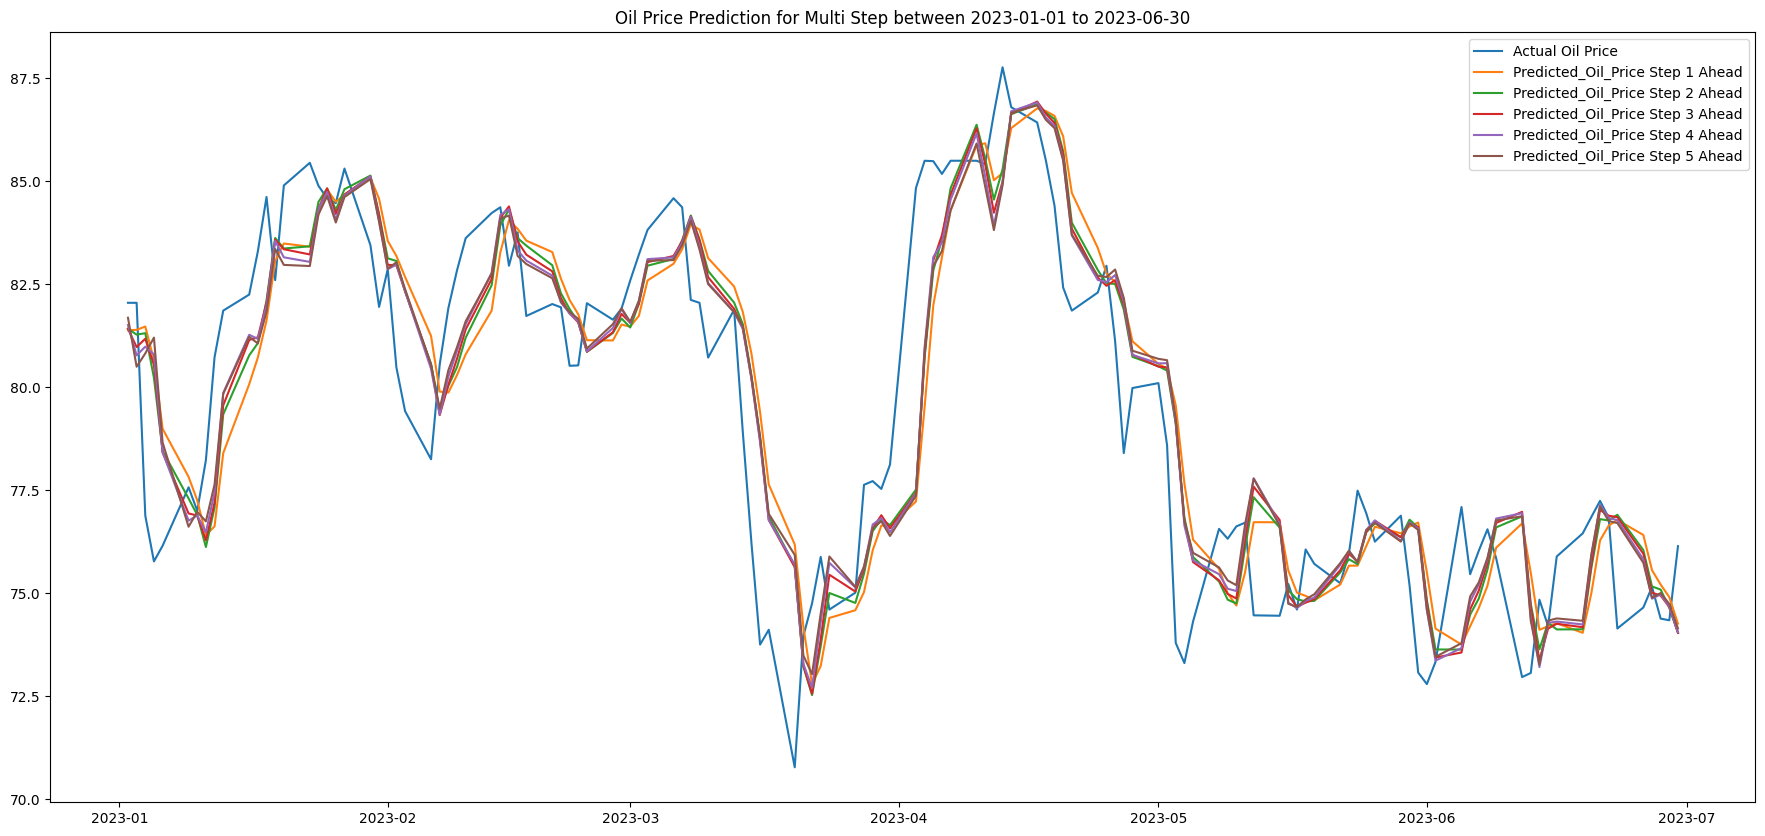

In [796]:

plt.figure(figsize=(22,10))
plt.plot(test_oil_currency['Original_Oil_Price'],label="Actual Oil Price")
plt.plot(test_oil_currency['Predicted_Oil_Price_MA_5_Scaled_Ahead1_inversed'],label="Predicted_Oil_Price Step 1 Ahead")
plt.plot(test_oil_currency['Predicted_Oil_Price_MA_5_Scaled_Ahead2_inversed'],label="Predicted_Oil_Price Step 2 Ahead")
plt.plot(test_oil_currency['Predicted_Oil_Price_MA_5_Scaled_Ahead3_inversed'],label="Predicted_Oil_Price Step 3 Ahead")
plt.plot(test_oil_currency['Predicted_Oil_Price_MA_5_Scaled_Ahead4_inversed'],label="Predicted_Oil_Price Step 4 Ahead")
plt.plot(test_oil_currency['Predicted_Oil_Price_MA_5_Scaled_Ahead5_inversed'],label="Predicted_Oil_Price Step 5 Ahead")
plt.title("Oil Price Prediction for Multi Step between 2023-01-01 to 2023-06-30")

plt.legend(loc="upper right")
plt.show()


In [815]:
test_oil_currency[['Original_Oil_Price','Predicted_Oil_Price_MA_5_Scaled_Ahead5','Predicted_Oil_Price_MA_5_Scaled_Ahead4', 'Predicted_Oil_Price_MA_5_Scaled_Ahead3', 'Predicted_Oil_Price_MA_5_Scaled_Ahead2', 'Predicted_Oil_Price_MA_5_Scaled_Ahead1']]

,Original_Oil_Price,Predicted_Oil_Price_MA_5_Scaled_Ahead5,Predicted_Oil_Price_MA_5_Scaled_Ahead4,Predicted_Oil_Price_MA_5_Scaled_Ahead3,Predicted_Oil_Price_MA_5_Scaled_Ahead2,Predicted_Oil_Price_MA_5_Scaled_Ahead1
Date,,,,,,
2023-01-02,82.05,0.532942,0.524892,0.520711,0.520895,0.519141
2023-01-03,82.05,0.478973,0.491459,0.500664,0.514307,0.519577
2023-01-04,76.88,0.493663,0.501109,0.509785,0.515941,0.523237
2023-01-05,75.77,0.511057,0.492605,0.480990,0.466777,0.486189
2023-01-06,76.15,0.395511,0.384722,0.384640,0.386387,0.410670
...,...,...,...,...,...,...
2023-06-26,74.65,0.263096,0.266917,0.273055,0.277011,0.293720
2023-06-27,75.15,0.224572,0.223552,0.230207,0.237037,0.255004
2023-06-28,74.38,0.229751,0.228279,0.226993,0.233583,0.239100


In [797]:
Oilmetrics = pd.DataFrame(Oilresults)
Oilmetrics

,Original Column,Predicted Column,Steps Ahead,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Original_Oil_Price,Predicted_Oil_Price_MA_5_Scaled_Ahead1_inversed,1,1.784010,5.209529,2.282439,2.264242
1,Original_Oil_Price,Predicted_Oil_Price_MA_5_Scaled_Ahead2_inversed,2,1.602976,4.259884,2.063949,2.036186
2,Original_Oil_Price,Predicted_Oil_Price_MA_5_Scaled_Ahead3_inversed,3,1.576903,4.204791,2.050559,2.003177
3,Original_Oil_Price,Predicted_Oil_Price_MA_5_Scaled_Ahead4_inversed,4,1.550276,4.103754,2.025772,1.969056
4,Original_Oil_Price,Predicted_Oil_Price_MA_5_Scaled_Ahead5_inversed,5,1.556167,4.185844,2.045934,1.975711


# CUrrency

In [798]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
exogdata=['Original_USD_EUR_Price_MA_7_Scaled_back1','Original_USD_EUR_Price_MA_7_Scaled_back2','Original_USD_EUR_Price_MA_7_Scaled_back3','Original_USD_EUR_Price_MA_7_Scaled_back4','Original_USD_EUR_Price_MA_7_Scaled_back5']

cur_model=SARIMAX(train_oil_currency['Original_USD_EUR_Price_MA_7_Scaled'],order=(4,1,5),exog=train_oil_currency[exogdata])
cur_model_fit=cur_model.fit(maxiter=1000)
cur_model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:     Original_USD_EUR_Price_MA_7_Scaled   No. Observations:                 1038
Model:                               SARIMAX(4, 1, 5)   Log Likelihood                3014.259
Date:                                Fri, 21 Jul 2023   AIC                          -5998.518
Time:                                        12:21:18   BIC                          -5924.357
Sample:                                    01-09-2019   HQIC                         -5970.381
                                         - 12-30-2022                                         
Covariance Type:                                  opg                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Original_USD_EUR_Price_MA_7_Scaled_back1     1.6086      0.079     20.470      0.000       1.455       1.763
Original_USD_EUR_Price_MA_7_Scaled_back2    -0.4485      0.130     -3.462      0.001      -0.702      -0.195
Original_USD_EUR_Price_MA_7_Scaled_back3    -1.0117      0.069    -14.715      0.000      -1.146      -0.877
Original_USD_EUR_Price_MA_7_Scaled_back4     1.0516      0.081     13.058      0.000       0.894       1.209
Original_USD_EUR_Price_MA_7_Scaled_back5    -0.3537      0.045     -7.791      0.000      -0.443      -0.265
ar.L1                                       -0.6740      0.051    -13.098      0.000      -0.775      -0.573
ar.L2                                       -1.2680      0.054    -23.303      0.000      -1.375      -1.161
ar.L3                                       -0.4771      0.053     -9.004      0.000      -0.581      -0.373
ar.L4                                       -0.4909      0.037    -13.213      0.000      -0.564      -0.418
ma.L1                                       -0.0073      0.053     -0.137      0.891      -0.112       0.097
ma.L2                                        0.7896      0.041     19.227      0.000       0.709       0.870
ma.L3                                        0.3348      0.074      4.546      0.000       0.190       0.479
ma.L4                                        0.3494      0.041      8.592      0.000       0.270       0.429
ma.L5                                        0.7744      0.050     15.551      0.000       0.677       0.872
sigma2                                       0.0002   6.18e-06     27.886      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):               125.16
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

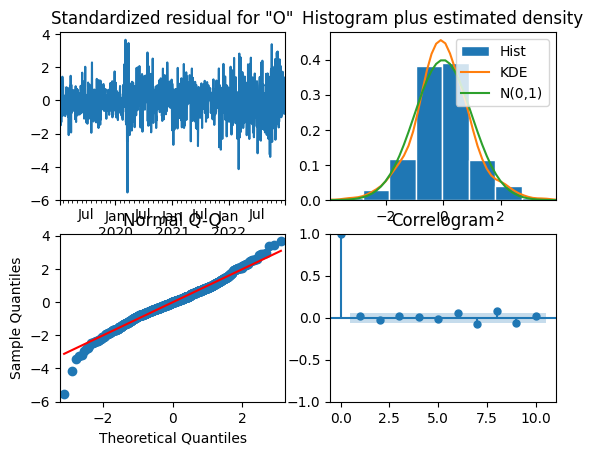

In [799]:
cur_model_fit.plot_diagnostics()
plt.show()


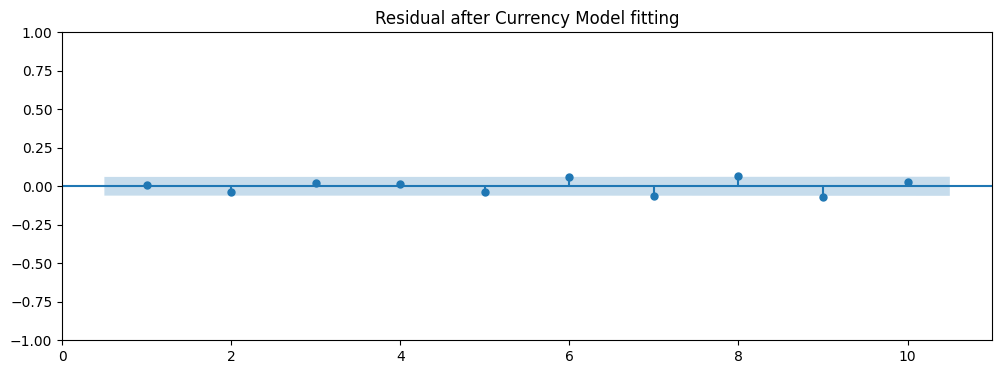

In [800]:
plot_acf_values(cur_model_fit.resid,10,"Residual after Currency Model fitting")

In [801]:
def GetMultiStepAheadPredictionExchange(NoOfExogs,StepsAheadPrediction):
      #NoOfExogs=5
      Latestexog=['Original_USD_EUR_Price_MA_7_Scaled_back' + str(i) for i in range(1,NoOfExogs+1)]
      #StepsAheadPrediction=5
      for i in range(1,StepsAheadPrediction+1):
        print(f"Latest exog is {Latestexog[-5:]}")
        #test_oil_currency[Latestexog].to_csv('output_exchange.csv', mode='a')
        testing_data_forecast = cur_model_fit.get_forecast(steps=len(test_oil_currency), alpha=0.05,exog=test_oil_currency[Latestexog[-5:]])
        test_oil_currency['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead'+str(i)] =  testing_data_forecast.predicted_mean
        Latestexog.pop(-1)
        Latestexog.insert(0,'Predicted_USD_EUR_Price_MA_7_Scaled_Ahead'+str(i))
        test_oil_currency['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead'+str(i)+'_inversed'] = scaler_Cur.inverse_transform(test_oil_currency['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead'+str(i)].values.reshape(-1, 1))



In [802]:
GetMultiStepAheadPredictionExchange(5,5)

Latest exog is ['Original_USD_EUR_Price_MA_7_Scaled_back1', 'Original_USD_EUR_Price_MA_7_Scaled_back2', 'Original_USD_EUR_Price_MA_7_Scaled_back3', 'Original_USD_EUR_Price_MA_7_Scaled_back4', 'Original_USD_EUR_Price_MA_7_Scaled_back5']
Latest exog is ['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead1', 'Original_USD_EUR_Price_MA_7_Scaled_back1', 'Original_USD_EUR_Price_MA_7_Scaled_back2', 'Original_USD_EUR_Price_MA_7_Scaled_back3', 'Original_USD_EUR_Price_MA_7_Scaled_back4']
Latest exog is ['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead2', 'Predicted_USD_EUR_Price_MA_7_Scaled_Ahead1', 'Original_USD_EUR_Price_MA_7_Scaled_back1', 'Original_USD_EUR_Price_MA_7_Scaled_back2', 'Original_USD_EUR_Price_MA_7_Scaled_back3']
Latest exog is ['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead3', 'Predicted_USD_EUR_Price_MA_7_Scaled_Ahead2', 'Predicted_USD_EUR_Price_MA_7_Scaled_Ahead1', 'Original_USD_EUR_Price_MA_7_Scaled_back1', 'Original_USD_EUR_Price_MA_7_Scaled_back2']
Latest exog is ['Predicted_USD_EUR_Price_MA_

In [803]:
Exchangeresults = []

Exchangeresults.append(calculate_metrics(test_oil_currency['Original_USD_EUR_Price'], test_oil_currency['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead1_inversed'], 'Original_USD_EUR_Price', 'Predicted_USD_EUR_Price_MA_7_Scaled_Ahead1_inversed', 1))
Exchangeresults.append(calculate_metrics(test_oil_currency['Original_USD_EUR_Price'], test_oil_currency['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead2_inversed'], 'Original_USD_EUR_Price', 'Predicted_USD_EUR_Price_MA_7_Scaled_Ahead2_inversed', 2))
Exchangeresults.append(calculate_metrics(test_oil_currency['Original_USD_EUR_Price'], test_oil_currency['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead3_inversed'], 'Original_USD_EUR_Price', 'Predicted_USD_EUR_Price_MA_7_Scaled_Ahead3_inversed', 3))
Exchangeresults.append(calculate_metrics(test_oil_currency['Original_USD_EUR_Price'], test_oil_currency['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead4_inversed'], 'Original_USD_EUR_Price', 'Predicted_USD_EUR_Price_MA_7_Scaled_Ahead4_inversed', 4))
Exchangeresults.append(calculate_metrics(test_oil_currency['Original_USD_EUR_Price'], test_oil_currency['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead5_inversed'], 'Original_USD_EUR_Price ', 'Predicted_USD_EUR_Price_MA_7_Scaled_Ahead5_inversed', 5))


In [804]:
pd.set_option('display.max_colwidth', None)

Exchangemetrics = pd.DataFrame(Exchangeresults)
Exchangemetrics

,Original Column,Predicted Column,Steps Ahead,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Original_USD_EUR_Price,Predicted_USD_EUR_Price_MA_7_Scaled_Ahead1_inversed,1,0.005870,0.000053,0.007249,0.541869
1,Original_USD_EUR_Price,Predicted_USD_EUR_Price_MA_7_Scaled_Ahead2_inversed,2,0.007838,0.000092,0.009586,0.720851
2,Original_USD_EUR_Price,Predicted_USD_EUR_Price_MA_7_Scaled_Ahead3_inversed,3,0.012264,0.000217,0.014736,1.126341
3,Original_USD_EUR_Price,Predicted_USD_EUR_Price_MA_7_Scaled_Ahead4_inversed,4,0.016156,0.000375,0.019363,1.483345
4,Original_USD_EUR_Price,Predicted_USD_EUR_Price_MA_7_Scaled_Ahead5_inversed,5,0.019029,0.000521,0.022826,1.747009


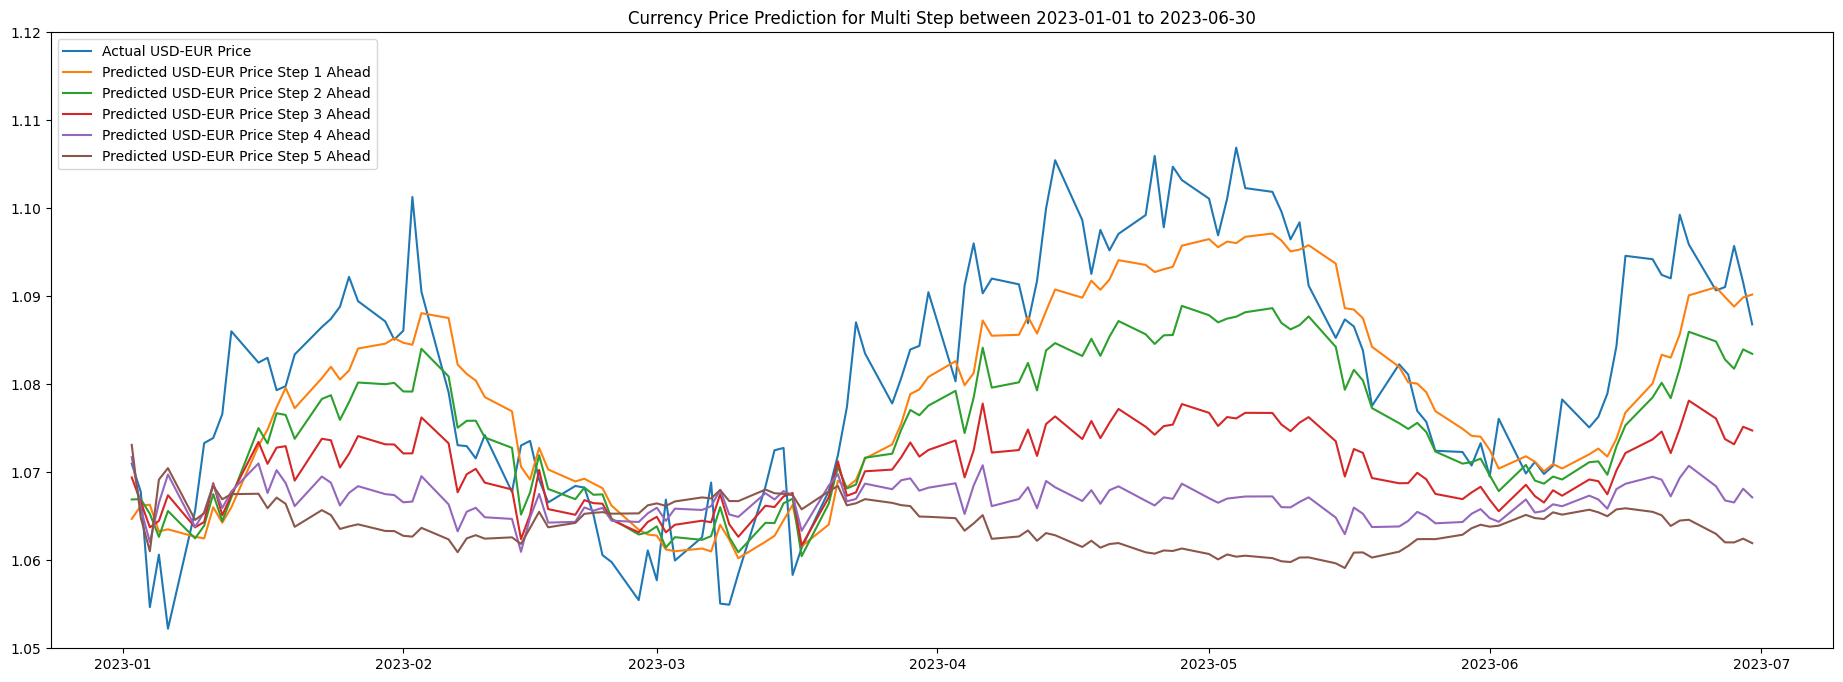

In [805]:

plt.figure(figsize=(23,8))
plt.plot(test_oil_currency['Original_USD_EUR_Price'],label="Actual USD-EUR Price")
plt.plot(test_oil_currency['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead1_inversed'],label="Predicted USD-EUR Price Step 1 Ahead")
plt.plot(test_oil_currency['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead2_inversed'],label="Predicted USD-EUR Price Step 2 Ahead")
plt.plot(test_oil_currency['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead3_inversed'],label="Predicted USD-EUR Price Step 3 Ahead")
plt.plot(test_oil_currency['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead4_inversed'],label="Predicted USD-EUR Price Step 4 Ahead")
plt.plot(test_oil_currency['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead5_inversed'],label="Predicted USD-EUR Price Step 5 Ahead")
plt.title("Currency Price Prediction for Multi Step between 2023-01-01 to 2023-06-30")
plt.ylim(1.05, 1.12)


plt.legend(loc="upper left")
plt.show()


#CUrrency+ Oil

In [806]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
exogdata=['Original_USD_EUR_Price_MA_7_Scaled_back1','Original_USD_EUR_Price_MA_7_Scaled_back2','Original_USD_EUR_Price_MA_7_Scaled_back3','Original_USD_EUR_Price_MA_7_Scaled_back4','Original_USD_EUR_Price_MA_7_Scaled_back5','Original_Oil_Price_MA_5_Scaled']

cur_oil_model=SARIMAX(train_oil_currency['Original_USD_EUR_Price_MA_7_Scaled'],order=(4,1,5),exog=train_oil_currency[exogdata])
cur_oil_model_fit=cur_oil_model.fit(maxiter=1000)
cur_oil_model_fit.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:     Original_USD_EUR_Price_MA_7_Scaled   No. Observations:                 1038
Model:                               SARIMAX(4, 1, 5)   Log Likelihood                3015.613
Date:                                Fri, 21 Jul 2023   AIC                          -5999.225
Time:                                        12:22:17   BIC                          -5920.120
Sample:                                    01-09-2019   HQIC                         -5969.213
                                         - 12-30-2022                                         
Covariance Type:                                  opg                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Original_USD_EUR_Price_MA_7_Scaled_back1     1.5675      0.086     18.142      0.000       1.398       1.737
Original_USD_EUR_Price_MA_7_Scaled_back2    -0.3959      0.141     -2.801      0.005      -0.673      -0.119
Original_USD_EUR_Price_MA_7_Scaled_back3    -0.9928      0.072    -13.733      0.000      -1.135      -0.851
Original_USD_EUR_Price_MA_7_Scaled_back4     0.9839      0.088     11.173      0.000       0.811       1.157
Original_USD_EUR_Price_MA_7_Scaled_back5    -0.3185      0.050     -6.399      0.000      -0.416      -0.221
Original_Oil_Price_MA_5_Scaled              -0.0003      0.003     -0.133      0.895      -0.005       0.005
ar.L1                                       -0.6340      0.058    -10.890      0.000      -0.748      -0.520
ar.L2                                       -1.2416      0.057    -21.853      0.000      -1.353      -1.130
ar.L3                                       -0.4407      0.057     -7.784      0.000      -0.552      -0.330
ar.L4                                       -0.4789      0.038    -12.601      0.000      -0.553      -0.404
ma.L1                                       -0.0124      0.057     -0.219      0.826      -0.123       0.099
ma.L2                                        0.8048      0.044     18.192      0.000       0.718       0.892
ma.L3                                        0.3279      0.080      4.095      0.000       0.171       0.485
ma.L4                                        0.3635      0.044      8.237      0.000       0.277       0.450
ma.L5                                        0.7773      0.055     14.061      0.000       0.669       0.886
sigma2                                       0.0002    6.3e-06     27.249      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):               136.21
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

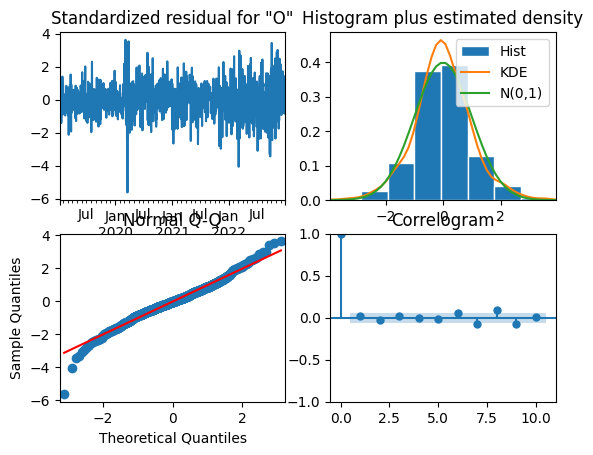

In [807]:
cur_oil_model_fit.plot_diagnostics()
plt.show()


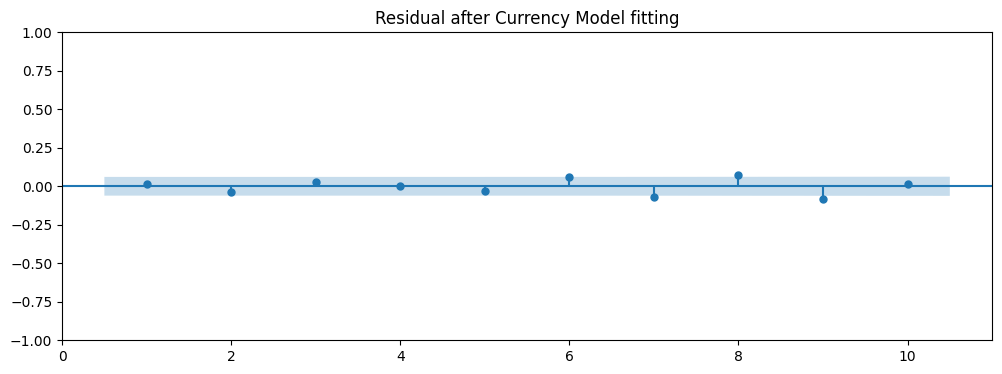

In [808]:
plot_acf_values(cur_oil_model_fit.resid,10,"Residual after Currency Model fitting")

In [809]:
def GetMultiStepAheadPrediction_Cur_Oil(NoOfExogs,StepsAheadPrediction):
      #NoOfExogs=5
      Latestexog=['Original_USD_EUR_Price_MA_7_Scaled_back' + str(i) for i in range(1,NoOfExogs+1)]

      #StepsAheadPrediction=5
      for i in range(1,StepsAheadPrediction+1):
        Latestexog.append('Predicted_Oil_Price_MA_5_Scaled_Ahead'+ str(i))
        print(f"Latest exog is {Latestexog[-6:]}")
        #test_oil_currency[Latestexog].to_csv('output_exchange_oil.csv', mode='a')
        testing_data_forecast = cur_oil_model_fit.get_forecast(steps=len(test_oil_currency), alpha=0.05,exog=test_oil_currency[Latestexog[-6:]])
        test_oil_currency['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil'+str(i)] =  testing_data_forecast.predicted_mean
        Latestexog.remove('Predicted_Oil_Price_MA_5_Scaled_Ahead'+ str(i))
        Latestexog.pop(-1)
        Latestexog.insert(0,'Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil'+str(i))
        test_oil_currency['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil'+str(i)+'_inversed'] = scaler_Cur.inverse_transform(test_oil_currency['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil'+str(i)].values.reshape(-1, 1))



In [810]:
GetMultiStepAheadPrediction_Cur_Oil(5,5)

Latest exog is ['Original_USD_EUR_Price_MA_7_Scaled_back1', 'Original_USD_EUR_Price_MA_7_Scaled_back2', 'Original_USD_EUR_Price_MA_7_Scaled_back3', 'Original_USD_EUR_Price_MA_7_Scaled_back4', 'Original_USD_EUR_Price_MA_7_Scaled_back5', 'Predicted_Oil_Price_MA_5_Scaled_Ahead1']
Latest exog is ['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil1', 'Original_USD_EUR_Price_MA_7_Scaled_back1', 'Original_USD_EUR_Price_MA_7_Scaled_back2', 'Original_USD_EUR_Price_MA_7_Scaled_back3', 'Original_USD_EUR_Price_MA_7_Scaled_back4', 'Predicted_Oil_Price_MA_5_Scaled_Ahead2']
Latest exog is ['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil2', 'Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil1', 'Original_USD_EUR_Price_MA_7_Scaled_back1', 'Original_USD_EUR_Price_MA_7_Scaled_back2', 'Original_USD_EUR_Price_MA_7_Scaled_back3', 'Predicted_Oil_Price_MA_5_Scaled_Ahead3']
Latest exog is ['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil3', 'Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil2', 'Predicted_USD_EUR_Price_MA_7_Sc

In [811]:
ExchangeresultsWithOil = []

ExchangeresultsWithOil.append(calculate_metrics(test_oil_currency['Original_USD_EUR_Price'], test_oil_currency['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil1_inversed'], 'Original_USD_EUR_Price', 'Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil1_inversed', 1))
ExchangeresultsWithOil.append(calculate_metrics(test_oil_currency['Original_USD_EUR_Price'], test_oil_currency['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil2_inversed'], 'Original_USD_EUR_Price', 'Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil2_inversed', 2))
ExchangeresultsWithOil.append(calculate_metrics(test_oil_currency['Original_USD_EUR_Price'], test_oil_currency['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil3_inversed'], 'Original_USD_EUR_Price', 'Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil3_inversed', 3))
ExchangeresultsWithOil.append(calculate_metrics(test_oil_currency['Original_USD_EUR_Price'], test_oil_currency['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil4_inversed'], 'Original_USD_EUR_Price', 'Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil4_inversed', 4))
ExchangeresultsWithOil.append(calculate_metrics(test_oil_currency['Original_USD_EUR_Price'], test_oil_currency['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil5_inversed'], 'Original_USD_EUR_Price', 'Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil5_inversed', 5))


In [812]:

OilExchangemetrics = pd.DataFrame(ExchangeresultsWithOil)
OilExchangemetrics

,Original Column,Predicted Column,Steps Ahead,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Original_USD_EUR_Price,Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil1_inversed,1,0.005910,0.000053,0.007290,0.545599
1,Original_USD_EUR_Price,Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil2_inversed,2,0.007881,0.000093,0.009631,0.724780
2,Original_USD_EUR_Price,Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil3_inversed,3,0.012226,0.000216,0.014686,1.122772
3,Original_USD_EUR_Price,Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil4_inversed,4,0.015962,0.000366,0.019144,1.465536
4,Original_USD_EUR_Price,Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil5_inversed,5,0.018734,0.000505,0.022477,1.719894


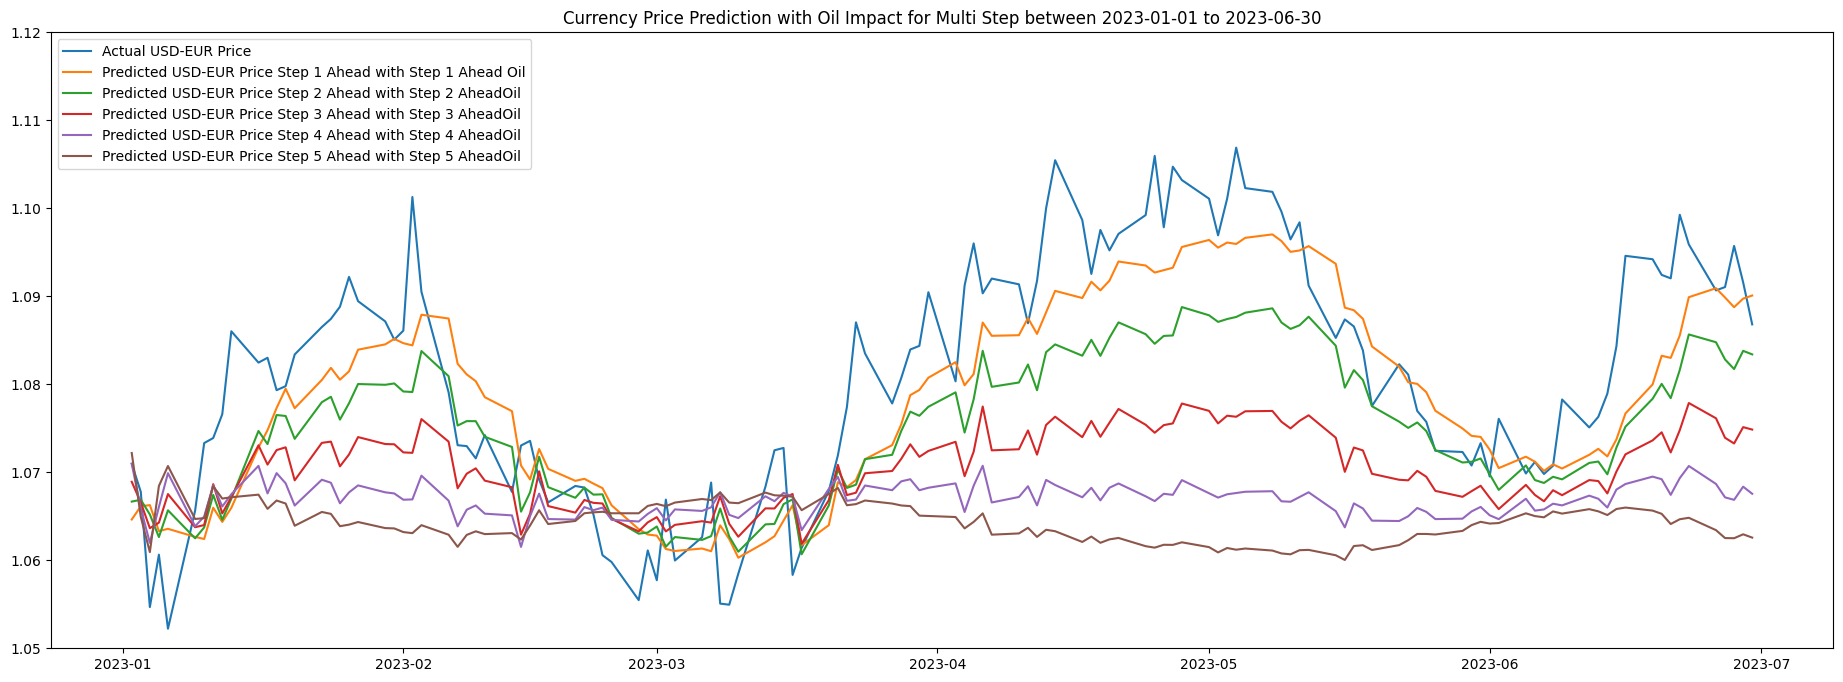

In [813]:

plt.figure(figsize=(23,8))
plt.plot(test_oil_currency['Original_USD_EUR_Price'],label="Actual USD-EUR Price")
plt.plot(test_oil_currency['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil1_inversed'],label="Predicted USD-EUR Price Step 1 Ahead with Step 1 Ahead Oil")
plt.plot(test_oil_currency['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil2_inversed'],label="Predicted USD-EUR Price Step 2 Ahead with Step 2 AheadOil")
plt.plot(test_oil_currency['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil3_inversed'],label="Predicted USD-EUR Price Step 3 Ahead with Step 3 AheadOil")
plt.plot(test_oil_currency['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil4_inversed'],label="Predicted USD-EUR Price Step 4 Ahead with Step 4 AheadOil")
plt.plot(test_oil_currency['Predicted_USD_EUR_Price_MA_7_Scaled_Ahead_Oil5_inversed'],label="Predicted USD-EUR Price Step 5 Ahead with Step 5 AheadOil")
plt.title("Currency Price Prediction with Oil Impact for Multi Step between 2023-01-01 to 2023-06-30")

plt.ylim(1.05, 1.12)

plt.legend(loc="upper left")
plt.show()
